In [2]:
# %% imports
# libraries
import torch
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# local imports
import MNIST_dataloader
# import autoencoder_template
from config_file import data_loc
from matplotlib import pyplot as plt
from MNIST_dataloader import create_dataloaders

c:\Users\Jexel\Documents\Yexel Files Documents\TUE Complete\WTB\Jaar 2 AIESW\Kwartiel 4\5LSL0 Machine learning for signal processing\Assignment\5LSL0-1\Assignment 4


# Week 1

### Exercise 1 - ISTA

##### (a)[3 pt]Create a Python function that implements ISTA for MNIST denoising. 
Make sure the function takes as inputs: step size μ, shrinkage parameter λ, number of
iteration K, and measurements (batch of MNIST images) y. It should output the
final batch of reconstructions xK.

hint: the images are normalized between -1 and 1, which means the background of the
images is not at zero. Think about how to still aply ISTA correctly.

In [3]:
########## Define Paramters
mu = 1e-4       # Step-size
shrinkage = 0   # 
K = 10          # Amount of itereations

In [4]:
### prepare the datasets
# get dataloader
batch_size = 64
train_loader, test_loader, val_loader = create_dataloaders(data_loc, batch_size)

In [59]:
# %% ISTA
def softthreshold(x,shrinkage):
    '''
    Implement soft threshold:
    F(x) = sign(x) * max(|x|)-lambda, 0_
    Arguments:
    ----------------------
    x: data-set (default: train_dataset)??
    shrinkage: float (default: --)
    '''
    new = torch.mul(torch.sign(x),torch.max(torch.abs(x)-shrinkage, 0)[0])
    
    return new

def ISTA(mu,shrinkage,K,y):
    '''
    Iterative shrinkage and Thresholding Algorithm

    Arguments:
    --------------------
    mu:     float (default: 0.5)
        The stepsize

    shrinkage:  float (default: 0.5)
        The shrinking paramter
    
    K: int (default: 10)
        The number of unfolding iterations
    
    y: ??? (default: ???)
        The measurement image.

    Returns:
    --------------------
    x: ??? (default: ???)
        The denoised image    
    '''
    # initialize
    ##### Using flattened features
    # y2 = y.flatten()
    # x = torch.zeros_like(y2)
    # A = torch.eye(len(y2)) # length = WxH of image y

    #### Using non-flattend features
    y = y
    x = torch.empty_like(y)
    A = torch.eye(y)    
    # use for-loop for K-number of iterations
    for i in range(K):
        ### write the for-loop
        pass



    

    return

In [14]:
y = torch.Tensor(32, 32).uniform_(-1,1)
print(y)

tensor([[-0.2090,  0.5695,  0.6551,  ...,  0.2472, -0.9094,  0.2093],
        [-0.5438, -0.5061,  0.5762,  ..., -0.9021,  0.0060, -0.6879],
        [ 0.4019, -0.9449,  0.4926,  ...,  0.0738, -0.1771,  0.5592],
        ...,
        [-0.1933,  0.2455, -0.6462,  ..., -0.9546, -0.1896,  0.0710],
        [-0.4428, -0.2875,  0.6662,  ..., -0.5267, -0.2497,  0.4986],
        [ 0.0650, -0.2121, -0.1713,  ..., -0.6910, -0.3264,  0.8051]])


In [18]:
z = y.flatten()
print(len(z))
shap = y.shape
print(shap)
A = torch.eye(y.shape[0])
print(A)
x = torch.empty(shap)
print(x.shape)


1024
torch.Size([32, 32])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
torch.Size([32, 32])


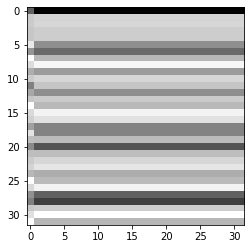

In [85]:
# init params
mu = 0.5
lamda = 0.5
K = 1
y = x_noisy_example[3,:,:,:]
y = y
x_test = torch.empty_like(y)
x = torch.zeros_like(y)
A = torch.eye(y.shape[0],y.shape[1])  

# softthreshold(x,shrinkage)
# we first initialize y->mu*A.T

x_0 = y@(mu*A.T) # --> soft-treshold ---> I-mu*A.T*A
x_0_soft = softthreshold(x_0,lamda)
# x_k = x_0 + (x_0_soft - x_0_soft*A)
for i in range(K):
    # p_init = (A@x - y)
    # x_k = x + mu*p_init
    x_k = x_0 + (x_0_soft - x_0_soft*A)
    x_0 = x_k
    x_0_soft = softthreshold(x_0,lamda)

plt.imshow(x_0_soft[0,:,:],cmap='gray')

    
      

In [71]:
x_noisy_example

tensor([[[[-0.5303,  0.2261, -1.4305,  ..., -1.2996, -0.7251, -1.7388],
          [-0.6452, -1.2132, -1.1929,  ..., -1.6255, -1.7102, -1.6422],
          [-1.5097, -0.9324, -1.6783,  ..., -0.6178, -1.1962, -1.8434],
          ...,
          [-0.8682, -1.3313, -0.8090,  ..., -1.1923, -0.0395, -1.0516],
          [-0.7573, -0.3469, -1.7947,  ...,  0.3228, -0.7713, -0.7367],
          [-1.0862, -1.1235, -1.5547,  ..., -1.4084, -0.8460, -0.9280]]],


        [[[-1.6549, -0.6092, -1.2485,  ..., -0.5038, -1.2268, -1.3574],
          [-1.0344, -1.6878, -1.2185,  ..., -0.2723, -0.2964, -0.1505],
          [-1.2929, -2.0204, -1.1897,  ..., -0.9976, -1.0987, -0.9843],
          ...,
          [-0.9823, -1.1581, -1.7435,  ..., -0.7535, -0.2427, -1.5870],
          [-1.0101, -1.1014, -1.0749,  ..., -0.6235, -1.7668, -1.2693],
          [-0.6484, -1.1633, -0.1700,  ..., -0.5256, -1.1546, -0.9140]]],


        [[[-0.8795, -2.0543, -1.0930,  ..., -1.0731, -0.4957, -0.5783],
          [-1.5600, -0.844

In [58]:
new = torch.max(torch.abs(x)-shrinkage, 0)
print(new[0])

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])


In [35]:
print(x)
print(x_0.size())
print(y.flatten()+1)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([32, 32])
tensor([0.7910, 1.5695, 1.6551,  ..., 0.3090, 0.6736, 1.8051])


In [ ]:
import numpy as np
 
# input two matrices
mat1 = np.array(([1, 6, 5],[3 ,4, 8],[2, 12, 3]))
mat2 = np.array(([3, 4, 6],[5, 6, 7],[6,56, 7]))
xx = np.array(([1, 0, 2]))
# This will return matrix product of two array
res = mat1 @ mat2
 
# print resulted matrix
print(xx)
print(mat1)
print(xx - mat1)

[1 0 2]
[[ 1  6  5]
 [ 3  4  8]
 [ 2 12  3]]
[[  0  -6  -3]
 [ -2  -4  -6]
 [ -1 -12  -1]]


In [86]:
train_loader, val_loader, test_loader = create_dataloaders(data_loc,batch_size)
x_clean_train = train_loader.dataset.Clean_Images
x_noisy_train = train_loader.dataset.Noisy_Images
labels_train  = train_loader.dataset.Labels
x_clean_test  = test_loader.dataset.Clean_Images
x_noisy_test  = test_loader.dataset.Noisy_Images
labels_test   = test_loader.dataset.Labels

# use these 10 examples as representations for all digits
x_clean_example = x_clean_test[0:10,:,:,:]
x_noisy_example = x_noisy_test[0:10,:,:,:]
labels_example = labels_test[0:10]

([], [])

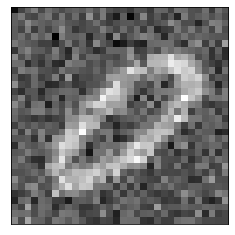

In [52]:
reconses = torch.zeros((10,1,x_noisy_example.shape[-1],x_noisy_example.shape[-1]))
test = x_noisy_example[1,0,:,:]
plt.imshow(x_noisy_example[3,0,:,:],cmap='gray')
plt.xticks([])
plt.yticks([])


##### (b) [2 pt] Use your ISTA algorithm on 10 example images. 
Show them in a figure consisting of 10 collumns (1 per digit) and 3 rows. Row 1 should contain the noisy
measurement, row 2 the reconstruction, and row 3 the actual ground truth target.
You will have to play with the values for μ, λ, and K. Explain what you see.

##### (c) [1 pt] To get a numerical estimate for the performance of ISTA, run it on the entire test set and report the resulting mean squared error (mse).